# Constraint analysis of National Grid data

National Grid maintain datasets on Constraint Management including historic costs and forecast constraint volumes. From National Grid's description - "Constraint management is required where the electricity transmission system is unable to transmit power to the location of demand, due to congestion at one or more parts of the transmission network."

Link - https://data.nationalgrideso.com/data-groups/constraint-management

This notebook explores the following datasets -

* **"Day Ahead Constraint Flows and Limits"** - A snapshot of the limits and flows at relevant boundaries at day ahead stage. These flow values are true for when the measurement was taken and will not reflect any changes in the flows following the publication of this data. 

* **"Thermal Constraint Costs"** - Thermal constraints are taken when the amount of energy that would flow naturally from one region to another exceeds the capacity of the circuits connecting the two regions. This dataset provides outturn system costs for thermal constraints across a number of significant constraint boundaries. (I am assuming that these costs are the total costs incurred due to thermal constraints incurred by actions taken by National Grid such as through the Balancing Mechanism.)

In [1]:
import pandas as pd
import numpy as np

The network diagrams show the constraint boundaries and arrows indicating the positive direction of power flow across each boundary.

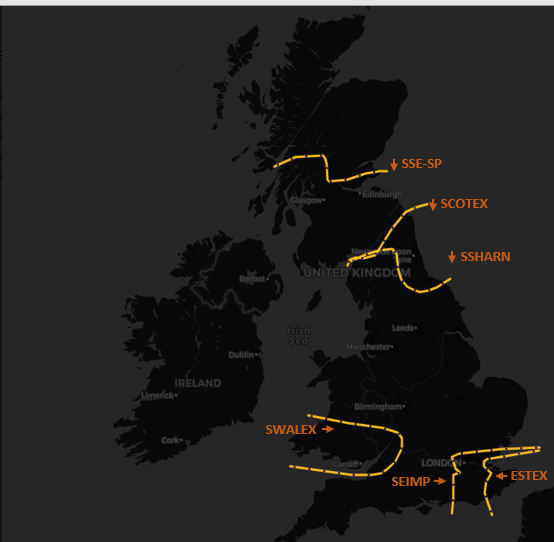

In [2]:
file = 'Constraint Map.png'
from IPython.display import Image
Image(filename=file)

## Day Ahead Constraint Flows and Limits

In [3]:
df = pd.read_csv('day-ahead-constraints-limits-and-flow-output-v1.4-4-2-1-2.csv')
df.index = pd.to_datetime(df['Date (UTC)'], dayfirst=True)
df.drop(columns=['Date (UTC)'], inplace=True)

In [4]:
boundaries = ['SSE-SP', 'SCOTEX', 'SSHARN', 'SWALEX', 'SEIMP', 'ESTEX']
data = []

for b in boundaries:

    df_1 = df.loc[df['Constraint Group'] == b].copy()
    df_1.drop(columns=['Constraint Group'], inplace=True)
    name1 = b + ' Limit (MW)'
    name2 = b + ' Flow (MW)'
    df_1.rename(columns={'Limit (MW)': name1, 'Flow (MW)': name2}, inplace=True)
    df_1 = df_1[~df_1.index.duplicated(keep='first')]
    data.append(df_1)

result = pd.concat(data, axis=1)
result

,SSE-SP Limit (MW),SSE-SP Flow (MW),SCOTEX Limit (MW),SCOTEX Flow (MW),SSHARN Limit (MW),SSHARN Flow (MW),SWALEX Limit (MW),SWALEX Flow (MW),SEIMP Limit (MW),SEIMP Flow (MW),ESTEX Limit (MW),ESTEX Flow (MW)
Date (UTC),,,,,,,,,,,,
2019-10-01 00:00:00,2150.0,956.74,4850.0,3455.28,6400.0,6078.51,3150.0,-908.81,6050.0,-1068.46,5450.0,3213.91
2019-10-01 00:30:00,2150.0,756.24,4850.0,3346.72,6400.0,6067.58,3150.0,-866.71,6050.0,-1782.94,5450.0,2128.73
2019-10-01 01:00:00,2150.0,423.44,4850.0,3097.69,6400.0,5919.67,3150.0,-838.15,6050.0,-1718.26,5450.0,1995.30
2019-10-01 01:30:00,2150.0,104.49,4850.0,2268.19,6400.0,5519.46,3150.0,-769.67,6050.0,-988.24,5450.0,2282.67
2019-10-01 02:00:00,2150.0,117.27,4850.0,2357.84,6400.0,5624.09,3150.0,-764.11,6050.0,-1101.06,5450.0,2053.67
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31 21:30:00,2700.0,633.00,3250.0,936.00,5400.0,1700.00,2460.0,1443.00,7100.0,3871.00,4600.0,3039.00
2022-03-31 22:00:00,2700.0,570.00,3250.0,1009.00,5400.0,1798.00,2460.0,1528.00,7100.0,3902.00,4600.0,2637.00
2022-03-31 22:30:00,2700.0,586.00,3250.0,1233.00,5400.0,2243.00,2460.0,481.00,7100.0,3660.00,4600.0,2479.00


Choose a boundary...

In [5]:
boundary = 'SCOTEX'

<ipython-input-6-4669eef0684a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boundary_df[name1] = np.where(boundary_df[name1] > q2, q1, boundary_df[name1])


<AxesSubplot:title={'center':'Limit and flow (MW) for a boundary over entire dataset'}, xlabel='Date (UTC)'>

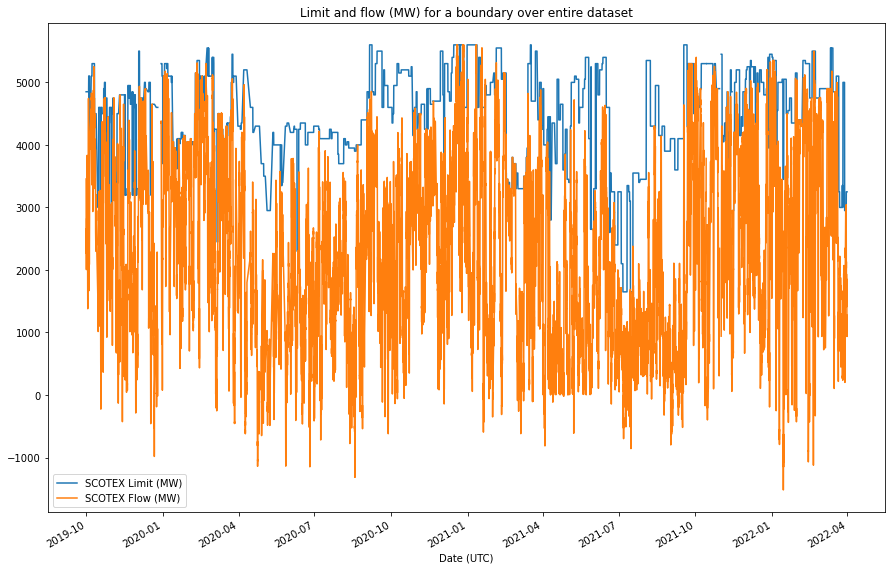

In [6]:
name1 = boundary + ' Limit (MW)'
name2 = boundary + ' Flow (MW)'
boundary_df = result[[name1, name2]]

q1 = boundary_df[name1].quantile(0.50)
q2 = boundary_df[name1].quantile(0.95)
boundary_df[name1] = np.where(boundary_df[name1] > q2, q1, boundary_df[name1])
max_flow = boundary_df[name1].max()

boundary_df[name2].values[boundary_df[name2] > max_flow] = max_flow

boundary_df.plot(figsize=(15,10), title='Limit and flow (MW) for a boundary over entire dataset')

<AxesSubplot:title={'center':'Limit and flow (MW) for a boundary over 2021'}, xlabel='Date (UTC)'>

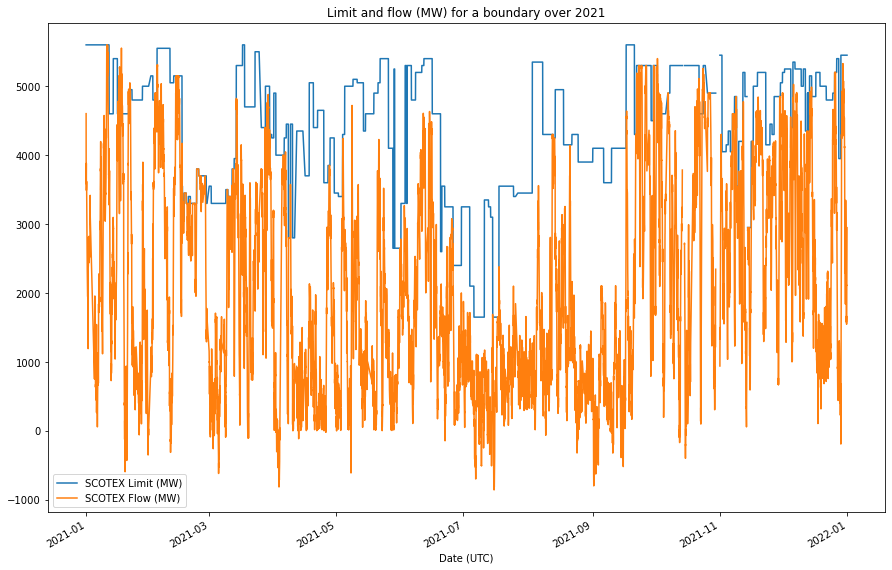

In [7]:
boundary_df['2021-01-01':'2021-12-31'].plot(figsize=(15,10), title='Limit and flow (MW) for a boundary over 2021')

<AxesSubplot:title={'center':'Limit and flow (MW) for a boundary over January 2021'}, xlabel='Date (UTC)'>

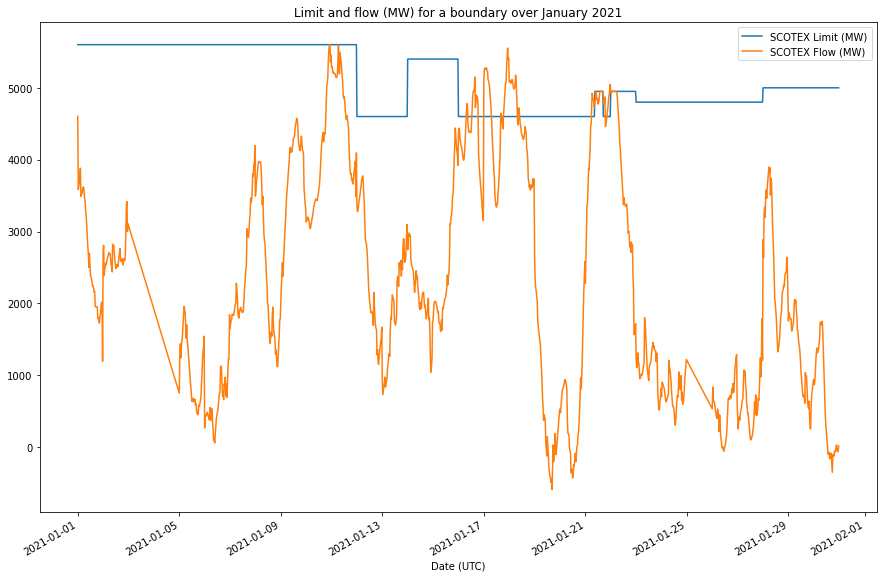

In [8]:
boundary_df['2021-01-01':'2021-01-31'].plot(figsize=(15,10), title='Limit and flow (MW) for a boundary over January 2021')

<AxesSubplot:title={'center':'Limit and flow (MW) for Scotland/England boundary over later half of September 2021'}, xlabel='Date (UTC)'>

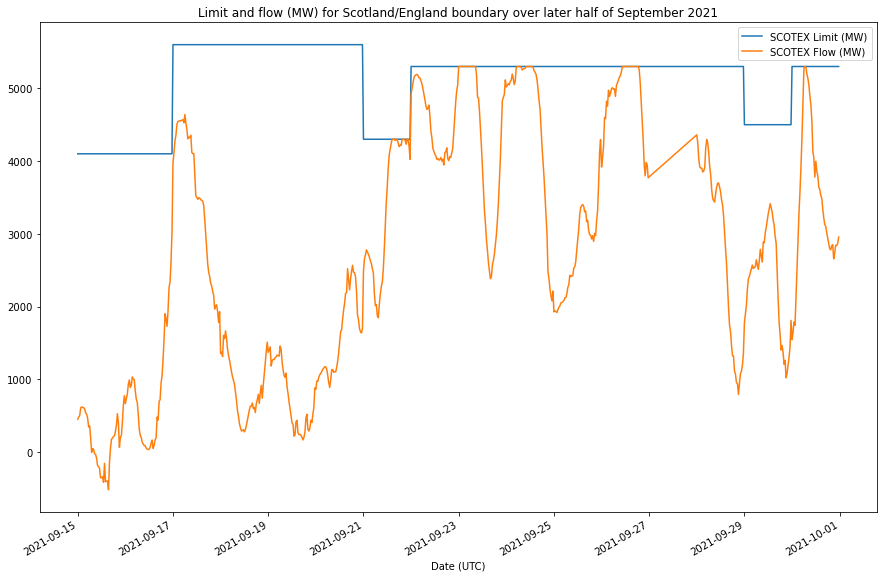

In [9]:
boundary_df['2021-09-15':'2021-09-30'].plot(figsize=(15,10), title='Limit and flow (MW) for Scotland/England boundary over later half of September 2021')

Now creating a dataframe signalling incidents where flow >= limits...

In [10]:
boundary_df['trial'] = boundary_df.loc[:, name2] / boundary_df.loc[:, name1]
boundary_df['Limit exceeded'] = boundary_df['trial'] >=  1
boundary_df['Limit exceeded'] = boundary_df['Limit exceeded'].astype(int)

<ipython-input-10-327a7cef41ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boundary_df['trial'] = boundary_df.loc[:, name2] / boundary_df.loc[:, name1]
<ipython-input-10-327a7cef41ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boundary_df['Limit exceeded'] = boundary_df['trial'] >=  1
<ipython-input-10-327a7cef41ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

<AxesSubplot:title={'center':'Signal is 1 for flow >= limit, and 0 for flow < limit'}, xlabel='Date (UTC)'>

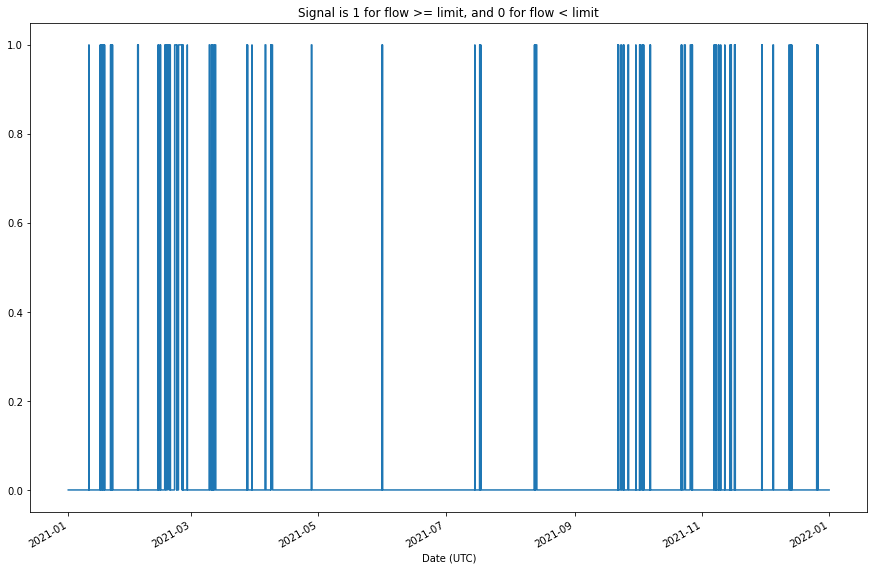

In [11]:
start = '2021-01-01'
end = '2021-12-31'

boundary_df['Limit exceeded'][start:end].plot(figsize=(15,10), title='Signal is 1 for flow >= limit, and 0 for flow < limit')

In [12]:
percent_constrained = round(boundary_df['Limit exceeded'].sum() *100 / (8760*2), 2)
print(percent_constrained, '% of year the boundary is constrained.')

10.99 % of year the boundary is constrained.


## Thermal Constraint Costs

In [13]:
df_cost1 = pd.read_excel('map-of-outturn-system-costs-19-20.xlsx', sheet_name='Data')
df_cost2 = pd.read_excel('map-of-outturn-system-costs-20-21.xlsx', sheet_name='Data')
df_cost3 = pd.read_excel('map-of-outturn-system-costs-21-22.xlsx', sheet_name='Data')

df_cost = pd.concat([df_cost1, df_cost2, df_cost3])

df_cost.index = pd.to_datetime(df_cost['Settlement Date'])
df_cost.drop(columns=['Settlement Date'], inplace=True)

In [14]:
data_cost = []

for b in boundaries:

    df_1 = df_cost.loc[df_cost['Constraint Group'] == b].copy()
    df_1.drop(columns=['Constraint Group'], inplace=True)
    name1 = b + ' Daily Cost (GBP)'
    df_1.rename(columns={'Daily Cost (GBP)': name1}, inplace=True)
    df_1 = df_1[~df_1.index.duplicated(keep='first')]
    # resample 
    df_1 = df_1.resample('0.5H').pad()
    data_cost.append(df_1)

result_cost = pd.concat(data_cost, axis=1)

<AxesSubplot:title={'center':'Thermal Constraint Costs over entire dataset'}, xlabel='Settlement Date'>

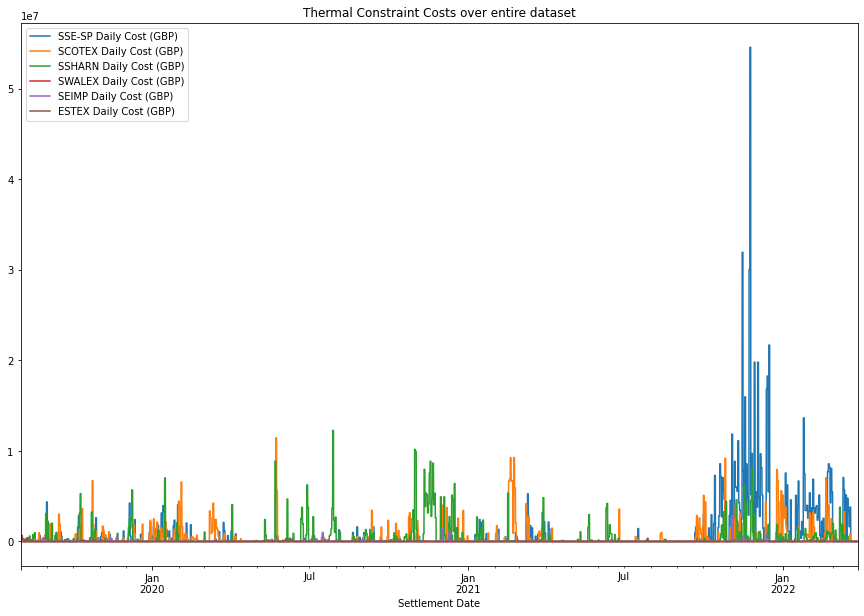

In [15]:
result_cost.plot(figsize=(15,10), title='Thermal Constraint Costs over entire dataset')

Choose boundary here...

In [16]:
boundary = 'SCOTEX'

name1 = boundary + ' Daily Cost (GBP)'
boundary_cost_df = result_cost[[name1]]

<AxesSubplot:title={'center':'Thermal Constraint Costs for Scotland/England boundary over later half of September 2021'}, xlabel='Settlement Date'>

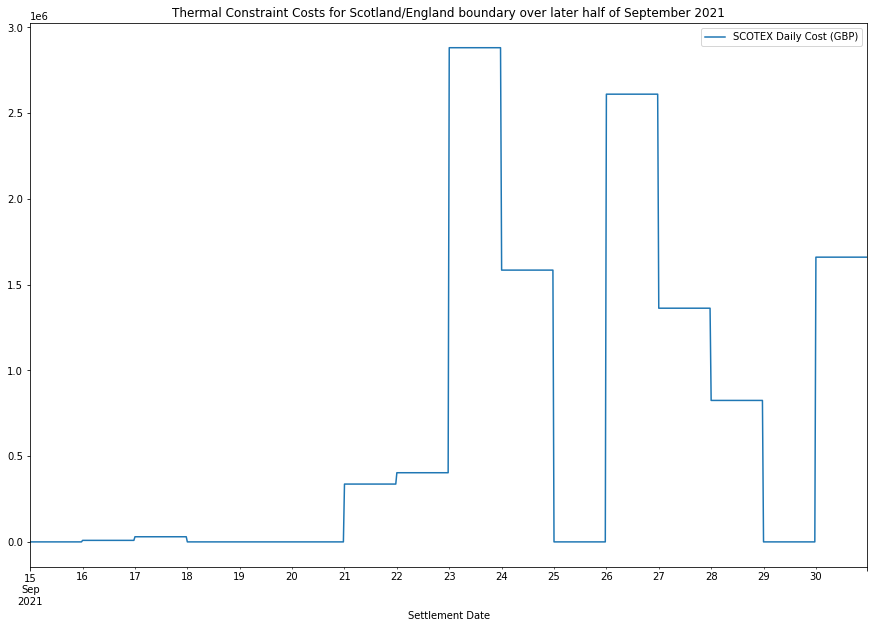

In [17]:
start = '2021-09-15'
end = '2021-09-30'

boundary_cost_df[start:end].plot(figsize=(15,10), title='Thermal Constraint Costs for Scotland/England boundary over later half of September 2021')

## Visualising constraint limit and flows alongside daily thermal constraint cost 

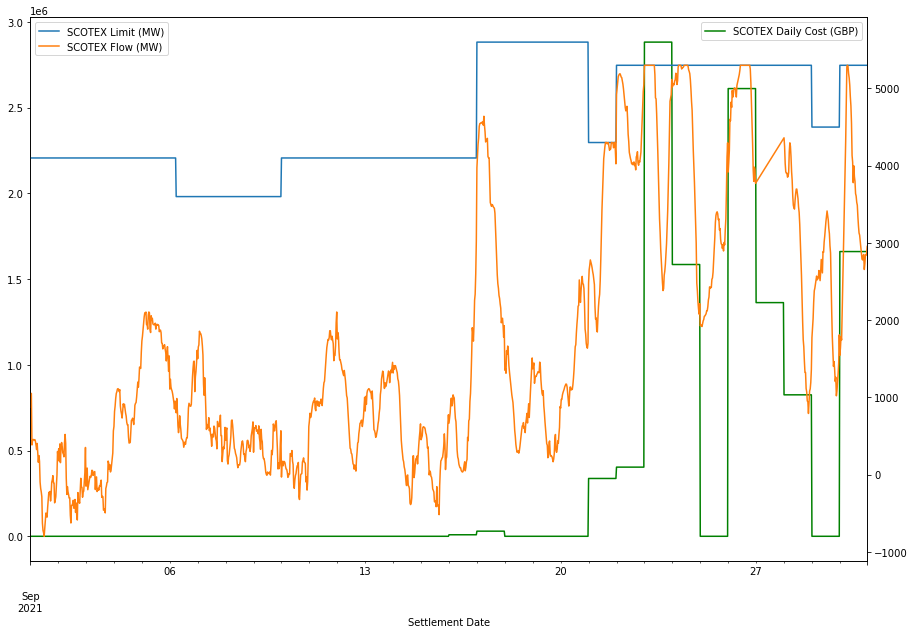

In [18]:
start = '2021-09-01'
end = '2021-09-30'

boundary_df2 = boundary_df.drop(columns=['Limit exceeded', 'trial'])

ax1 = boundary_cost_df[start:end].plot(color = 'green')

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
boundary_df2[start:end].plot(ax=ax2, figsize=(15,10)).legend(loc='upper left')